In [1]:
from utils import *
from IPython.display import Latex

%matplotlib inline
%load_ext lab_black

In [2]:
data_folder = "/home/gillard/Bureau/MISP_Analysis/Back-up/WEIS2022"
output_folder = "/home/gillard/Bureau/PhD School/ETHZ Project/Results"
image_folder = "Results"

In [3]:
events = pd.read_csv(f"{data_folder}/Events.csv")  # , nrows=10000)
attributes = pd.read_csv(f"{data_folder}/Attributes.csv")  # , nrows=1000000)
tags = pd.read_csv(f"{data_folder}/Tags.csv")  # , nrows=10000)
organisations = pd.read_csv(f"{data_folder}/Organisations.csv")  # , nrows=10000)

/home/gillard/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
attributes = attributes[attributes["Orgc ID"] != 1203]
attributes["Value"].replace("", np.nan, inplace=True)
attributes.dropna(subset=["Value"], inplace=True)
Value_ID = attributes["Value"].astype("category").cat.codes
attributes["Value ID"] = Value_ID
attributes = attributes[attributes["Value ID"].duplicated(keep=False)]

In [5]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6304800 entries, 28 to 9423341
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Event ID            object 
 1   Orgc ID             float64
 2   Org ID              float64
 3   Attribute ID        float64
 4   UUID                object 
 5   Attribute Type      object 
 6   Attribute Category  object 
 7   Distribution        float64
 8   Timestamp           float64
 9   Event Date          object 
 10  Event Published     float64
 11  Published           object 
 12  Deleted             object 
 13  Value               object 
 14  Comment             object 
 15  Value ID            int32  
dtypes: float64(6), int32(1), object(9)
memory usage: 793.7+ MB


/home/gillard/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute ID', ylabel='Value ID'>

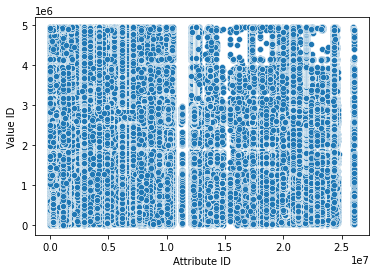

In [6]:
sns.scatterplot(attributes["Attribute ID"], attributes["Value ID"])

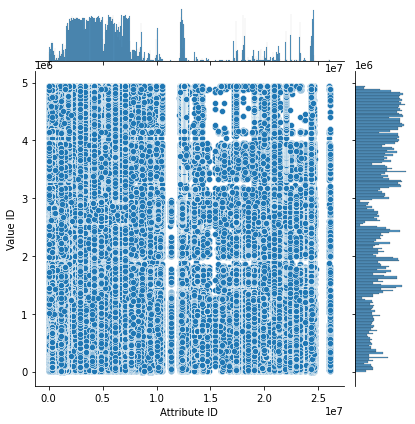

In [7]:
sns.jointplot(x=attributes["Attribute ID"], y=attributes["Value ID"])

(array([[6304800.]]),
 array([4.0000000e+00, 2.6076662e+07]),
 array([1.700000e+01, 4.944744e+06]),
 <matplotlib.collections.QuadMesh at 0x7f44e8197eb0>)

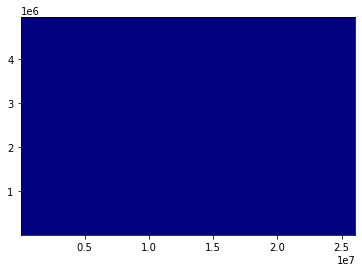

In [8]:
plt.hist2d(attributes["Attribute ID"], attributes["Value ID"], bins=1, cmap="jet")

In [9]:
Inheritance = attributes["Value ID"].value_counts()[
    attributes["Value ID"].value_counts() > 9
]
# Inheritance = attributes["Value ID"].value_counts(sort=False, ascending=False)
print(Inheritance)

3937971    1075
1278656     769
1238064     747
2255276     690
1279342     678
           ... 
779838       10
137166       10
2740563      10
2840267      10
2865784      10
Name: Value ID, Length: 32342, dtype: int64


## Representation of the Clusters of Attributes

The size of the circle represent the similar attributes. Then, the more the circle is big, the more attributes are similar

[1100  800  700 ...   10   10   10]


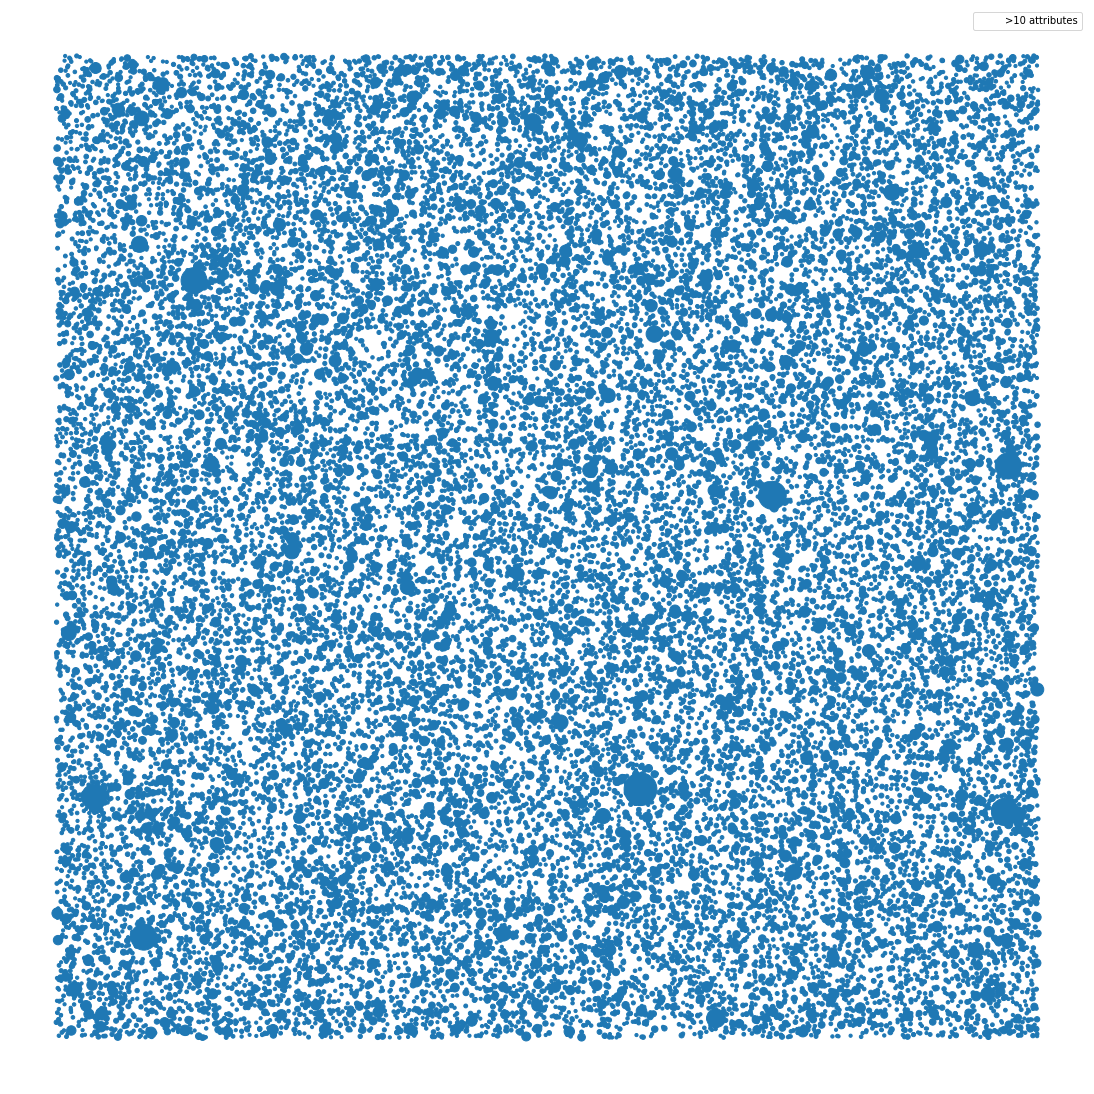

In [10]:
Number_of_attr_per_cluster = Inheritance.tolist()
Val_ID = Inheritance.keys().tolist()
labels = {}

Round_Nb = np.zeros((len(Number_of_attr_per_cluster)), dtype=int)
for idy, y in enumerate(Number_of_attr_per_cluster):
    if y < 100:
        Round_Nb[idy] = round(y, -1)
    else:
        Round_Nb[idy] = round(y, -2)
print(Round_Nb)

plt.figure(figsize=(15, 15))
Cluster = nx.Graph()
Cluster.add_nodes_from(Val_ID)
nx.draw_random(Cluster, node_size=Number_of_attr_per_cluster, label=">10 attributes")
leg = plt.legend(fancybox=True)
for item in leg.legendHandles:
    item.set_visible(False)
plt.show()

## Open .json from the vectorization of the attributes Values

In [11]:
matrix_vect_NLP = pd.read_csv("Inheritance_subset.csv")  # , nrows=10000)
del matrix_vect_NLP["Unnamed: 0"]
matrix_vect_NLP

,6468741,6468742,6468743,6468744,6468745,6468746,6468747,6468748,6895929,6895930,...,72184,72185,72186,72187,72188,72189,72190,72191,72192,72193
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0
1,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0
2,0.270,0.270,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0
3,0.179,0.179,0.292,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0
4,0.179,0.179,0.292,1.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.160,0.160,0.209,0.286,0.286,0.321,0.321,0.154,0.173,0.178,...,0.264,0.264,0.258,0.254,0.241,1.000,0.000,0.000,0,0
96,0.160,0.160,0.209,0.286,0.286,0.321,0.321,0.154,0.173,0.178,...,0.264,0.264,0.258,0.254,0.241,1.000,1.000,0.000,0,0
97,0.390,0.390,0.203,0.196,0.196,0.265,0.265,0.215,0.193,0.194,...,0.291,0.291,0.219,0.338,0.167,0.229,0.229,1.000,0,0
98,0.329,0.329,0.215,0.213,0.213,0.253,0.253,0.225,0.203,0.182,...,0.314,0.314,0.267,0.230,0.143,0.242,0.242,0.941,1,0


In [30]:
A = matrix_vect_NLP.to_numpy().T

for i in range(len(A)):
    for j in range(len(A)):
        if i == j:
            A[i, j] = 0

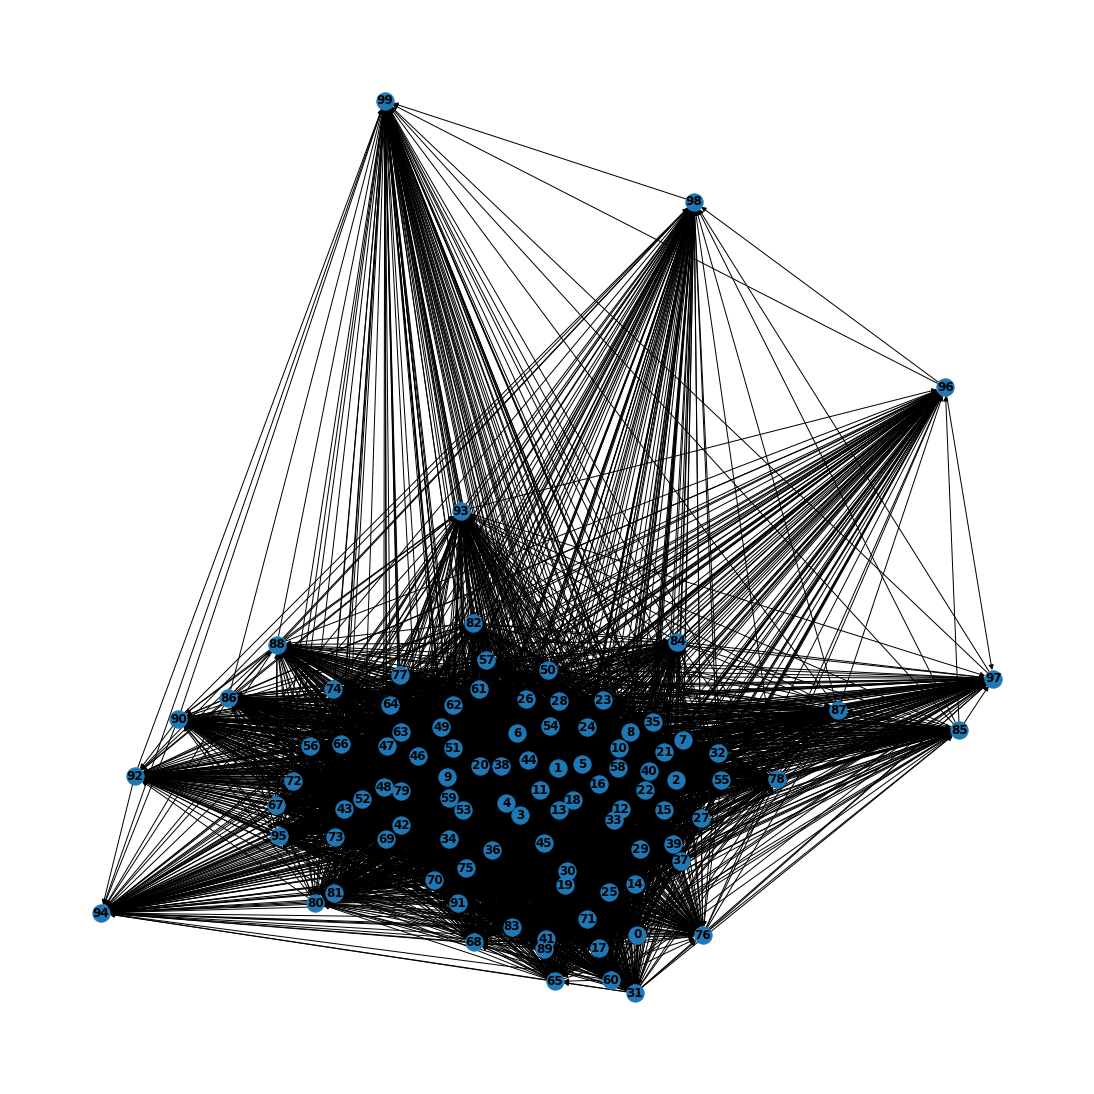

In [31]:
G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
plt.figure(1, figsize=(15, 15))
nx.draw(
    G,
    with_labels=True,
    width=1.0,
    font_weight="bold",
    arrowstyle="-|>",
    arrowsize=10,
)

In [29]:
# nx.degree_centrality(G)

nx.closeness_centrality(G)

{0: 1.0,
 1: 0.98989898989899,
 2: 0.9797979797979798,
 3: 0.9696969696969697,
 4: 0.9595959595959596,
 5: 0.9494949494949495,
 6: 0.9393939393939394,
 7: 0.9292929292929293,
 8: 0.9191919191919192,
 9: 0.9090909090909091,
 10: 0.898989898989899,
 11: 0.8888888888888888,
 12: 0.8787878787878788,
 13: 0.8686868686868687,
 14: 0.8585858585858586,
 15: 0.8484848484848485,
 16: 0.8383838383838383,
 17: 0.8282828282828283,
 18: 0.8181818181818182,
 19: 0.8080808080808081,
 20: 0.797979797979798,
 21: 0.7878787878787878,
 22: 0.7777777777777778,
 23: 0.7676767676767676,
 24: 0.7575757575757576,
 25: 0.7474747474747475,
 26: 0.7373737373737373,
 27: 0.7272727272727273,
 28: 0.7171717171717171,
 29: 0.7070707070707071,
 30: 0.696969696969697,
 31: 0.6868686868686869,
 32: 0.6767676767676768,
 33: 0.6666666666666666,
 34: 0.6565656565656566,
 35: 0.6464646464646465,
 36: 0.6363636363636364,
 37: 0.6262626262626263,
 38: 0.6161616161616161,
 39: 0.6060606060606061,
 40: 0.5959595959595959,
 41: 